<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Machine Learning Python Code Snippets

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a set of **Machine Learning Python Code Snippets** to help folks build machine learning workflows in Python.

**YouTube Lecture**: check out my live code walk-thoughs in my data science basics in Python playlist:

* [Data Science Basics in Python Playlist](https://youtube.com/playlist?list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&si=z9BF45XAod6brI8Z)

These walkthrough support of my courses,

* [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI)

* [Data Analytics and Geostatistics Course](https://youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&si=XobEAdz3ntDdp870)

on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation

I taught a high school hackathon with great students from all over Texas and beyond and I felt that they could use some additional resources in the form of a **code snippets** to help them over the hurdles of completing their first data science workflow in Python. 

Remember the definition of a code snippet is,

* a small, reusable section of code that programmers can quickly insert into a larger codebase

My goal is to,

* **provide a set of minimum, simple code snippets** to accomplish basic data science modeling build steps

* **avoid fancy additions**, like automatic diagnostics and plotting that are specific to the problem setting that will break with new data

Therefore, improvements and additions to provide diagnostic outputs and plots are highly recommended.

#### Import Required Packages

We need some standard packages. These should have been installed with Anaconda 3.

In [99]:
import numpy as np                                            # arrays
import pandas as pd                                           # dataframes
import matplotlib.pyplot as plt                               # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator) # control of axes ticks
from sklearn.experimental import enable_iterative_imputer     # required for MICE imputation
from sklearn.impute import IterativeImputer                   # MICE imputation
from sklearn.model_selection import train_test_split          # train and test split
from sklearn.linear_model import LinearRegression             # linear regression
from sklearn.preprocessing import StandardScaler              # standardize the features
from sklearn.preprocessing import MinMaxScaler                # min and max normalization
from sklearn.neighbors import KNeighborsRegressor             # K-nearest neighbours
from sklearn import tree                                      # decision tree
from sklearn import metrics                                   # measures to check our models
plt.rc('axes', axisbelow=True)                                # set axes and grids in the background for all plots
import math                                                  
seed = 13

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Here's the functions to improve code readability.

In [5]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Load a Data Table, DataFrame

In [7]:
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_missing.csv") # load the data from my github repo
df.head()                                                     # preview the first 5 samples of the DataFrame

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,NaN,14.05,1.36,1.85,177.381958
1,2,15.34,NaN,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,NaN,58.81,0.40,2.03,1488.317629
4,5,19.53,NaN,2.57,NaN,NaN,2.11,5261.094919


#### Check the Summary Statistics

In [9]:
df.describe()                                                 # calculate the summary statistics of each feature

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
count,1000.000000,913.000000,722.000000,881.000000,716.000000,735.000000,716.000000,1000.000000
mean,500.500000,14.898708,1.383061,2.984200,49.607696,0.999551,1.996173,2247.295809
std,288.819436,3.069919,0.405907,0.579875,14.814398,0.503423,0.313705,1464.256312
min,1.000000,5.400000,0.120000,0.960000,-1.500000,-0.250000,0.900000,2.713535
25%,250.750000,12.770000,1.120000,2.570000,39.995000,0.640000,1.817500,1191.369560
50%,500.500000,14.950000,1.375000,3.010000,49.815000,0.990000,2.000000,1976.487820
75%,750.250000,17.060000,1.650000,3.360000,58.955000,1.365000,2.190000,3023.594214
max,1000.000000,24.650000,2.580000,4.700000,93.470000,2.710000,2.900000,12568.644130


#### Select Features

Build a new DataFrame with only the selected predictor feature.

1. specify the selected predictor features

2. specify the response feature

3. build a list with both

4. make a new DataFrame with first the predictor features and then the response feature as the last column

In [11]:
selected_predictor_features = ['Por','LogPerm','AI','Brittle'] # set the selected predictor features
response_feature = ['Production']                             # set the response feature
features = selected_predictor_features + response_feature     # build a list of selected predictor and response features
df_selected = df.loc[:,features]                              # slice the DataFrame
df_selected.head()

,Por,LogPerm,AI,Brittle,Production
0,15.91,1.67,NaN,14.05,177.381958
1,15.34,NaN,2.60,31.88,1479.767778
2,20.45,2.02,3.13,63.67,4421.221583
3,11.95,1.14,NaN,58.81,1488.317629
4,19.53,NaN,2.57,NaN,5261.094919


#### Separate Predictors and Response Features

Separate DataFrame into,

* predictor features DataFrame, X

* response feature DataFrame, y

In [13]:
X = df_selected.loc[:,selected_predictor_features]            # slice a X, predictor 
y = df_selected.loc[:,response_feature]
print('Predictor Features: ' + str(X.columns))
print('Response Feature: ' + str(y.columns))

Predictor Features: Index(['Por', 'LogPerm', 'AI', 'Brittle'], dtype='object')
Response Feature: Index(['Production'], dtype='object')


#### Impute Missing Values

Impute the missing values in the predictor features

In [15]:
mice_imputer = IterativeImputer(random_state = seed)          # instantiate Multiple Imputation by Chained Equations (MICE) imputer
X_imputed = mice_imputer.fit_transform(X)                     # train and apply MICE to impute the missing data
X_imputed = pd.DataFrame(X_imputed, columns=X.columns, index=X.index) # make imputed results into a DataFrame with same columns as X
X_imputed.describe()                                          # preview the DataFrame

,Por,LogPerm,AI,Brittle
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.927466,1.398243,2.986745,49.730514
std,2.993056,0.383795,0.554284,12.668842
min,5.400000,0.120000,0.960000,-1.500000
25%,12.870000,1.149295,2.600000,43.371234
50%,15.005088,1.394000,3.010000,49.874817
75%,16.982500,1.650000,3.330000,55.953832
max,24.650000,2.580000,4.700000,93.470000


#### Normalized Predictor Features

Normalize the predictor features to remove any sensitivity to feature range or variance, for example,

* put features all on equal playing field for distance calculations

Min / max normalization forces the minimum to be 0.0 and the maximum to be 1.0

In [17]:
normalizer = MinMaxScaler()                                   # instantiate min / max normalizer  
norm_array = normalizer.fit_transform(X_imputed)              # normalize the predictor features                 
X_imputed_norm = pd.DataFrame(norm_array, columns=X_imputed.columns) # convert output to a DataFrame
X_imputed_norm.describe()                                     # preview the DataFrame

,Por,LogPerm,AI,Brittle
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.494933,0.519611,0.541910,0.539439
std,0.155483,0.156014,0.148204,0.133398
min,0.000000,0.000000,0.000000,0.000000
25%,0.388052,0.418413,0.438503,0.472478
50%,0.498966,0.517886,0.548128,0.540958
75%,0.601688,0.621951,0.633690,0.604968
max,1.000000,1.000000,1.000000,1.000000


#### Standardize Predictor Features

Standardize the predictor features to remove any sensitivity to feature range or variance, for example,

* put features all on equal playing field for distance calculations

Standardization forces the mean to be 0.0 and the standard deviation to be 1.0

In [19]:
scaler = StandardScaler()                                     # instantiate standardizer  
standard_array = scaler.fit_transform(X_imputed)              # standardize the predictor features    
X_imputed_stand = pd.DataFrame(standard_array, columns=X_imputed.columns) # convert output to a DataFrame
X_imputed_stand.describe()                                    # preview the DataFrame

,Por,LogPerm,AI,Brittle
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.735590e-16,-4.263256e-17,-3.774758e-16,3.463896e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.184783e+00,-3.332201e+00,-3.658339e+00,-4.045843e+00
25%,-6.877572e-01,-6.489712e-01,-6.980867e-01,-5.022134e-01
50%,2.594700e-02,-1.106139e-02,4.197623e-02,1.139608e-02
75%,6.869440e-01,6.562959e-01,6.195864e-01,4.914760e-01
max,3.249989e+00,3.080677e+00,3.092480e+00,3.454252e+00


#### Train and Test Split

Random splitting of the data into train and test splits.

In [21]:
test_proportion = 0.2                                         # set the proportion of withheld testing data
X_imputed_norm_train, X_imputed_norm_test, y_train, y_test = train_test_split(X_imputed_norm, y, test_size=test_proportion, random_state=seed) # train and test split

#### Train Linear Regression Model

Train model parameters on training data, no hyperparameters

In [23]:
linear_model = LinearRegression().fit(X_imputed_norm_train,y_train) # instantiate and train linear regression model, no hyperparmeters

#### Predict with Linear Model on Training Data

In [25]:
y_train_predict = linear_model.predict(X_imputed_norm_train)  # predict over the training data

#### Calculate Model Training MSE

In [27]:
MSE_train = metrics.mean_squared_error(y_train,y_train_predict) # calculate the training MSE
print('Model Training MSE: ' + str(MSE_train))                # print the training MSE

Model Training MSE: 1028796.2941654819


#### Training Cross Validation Plot

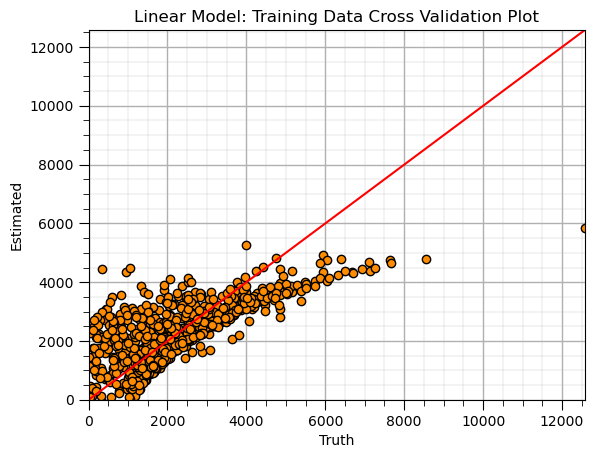

In [128]:
plt.scatter(y_train,y_train_predict,color='darkorange',edgecolor='black',label=r'Training Data') # scatter plot
plt.plot([0,max(np.max(y_train_predict),np.max(y_train))],[0,max(np.max(y_train_predict),np.max(y_train))],color='red') # 45 degree line
plt.ylabel('Estimated'); plt.xlabel('Truth'); plt.title('Linear Model: Training Data Cross Validation Plot') # labels
plt.xlim(0,max(np.max(y_train_predict),np.max(y_train))); plt.ylim(0,max(np.max(y_train_predict),np.max(y_train))) # plot ranges
add_grid();                                                   # add major and minor grid lines 

#### Predict at the Testing Data

In [131]:
y_test_predict = linear_model.predict(X_imputed_norm_test)    # predict over the testing data

#### Calculate Model Testing MSE

In [134]:
MSE_test = metrics.mean_squared_error(y_test,y_test_predict)  # calculate the testing MSE
print('Model Training MSE: ' + str(MSE_test))                 # print the testing MSE

Model Training MSE: 1465542.4902960763


#### Testing Cross Validation Plot

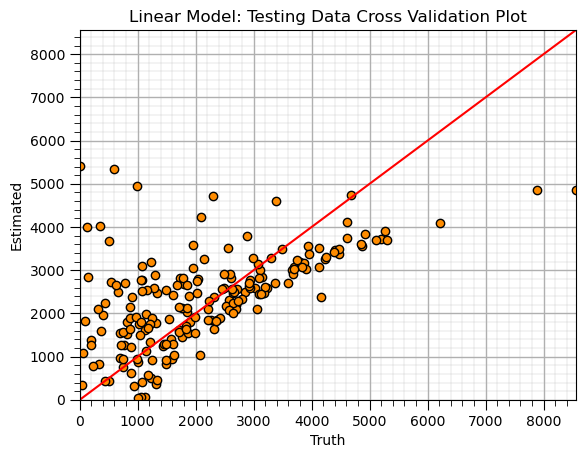

In [137]:
plt.scatter(y_test,y_test_predict,color='darkorange',edgecolor='black',label=r'Testing Data') # scatter plot
plt.plot([0,max(np.max(y_test_predict),np.max(y_test))],[0,max(np.max(y_test_predict),np.max(y_test))],color='red') # 45 degree line
plt.ylabel('Estimated'); plt.xlabel('Truth'); plt.title('Linear Model: Testing Data Cross Validation Plot') # labels
plt.xlim(0,max(np.max(y_test_predict),np.max(y_test))); plt.ylim(0,max(np.max(y_test_predict),np.max(y_test))) # plot ranges
add_grid();                                                   # add major and minor grid lines 

#### Train K-Nearest Neighbours Regression Model

In [82]:
n_neighbours = 20; p = 2; weights = 'uniform'                 # model hyperparameters
neigh = KNeighborsRegressor(weights = weights,n_neighbors=n_neighbours,p = p) # instantiate the prediction model
neigh_fit = neigh.fit(X_imputed_norm_train,y_train)           # train the model with the training data

#### Tune K-Nearest Neighbours Regression Model

In [101]:
k = 1; weights = 'uniform'                                    # set initial, lowest k hyperparameter
MSE_knn_list = []; k_list = []                                    # make lists to store the results
while k <= 150:                                               # loop over the k hyperparameter
    knn_model = KNeighborsRegressor(weights = weights, n_neighbors=k, p = 2).fit(X_imputed_norm_train,y_train) # instandiate and train the model
    y_test_pred = knn_model.predict(X_imputed_norm_test)      # predict over the testing cases
    MSE = metrics.mean_squared_error(y_test,y_test_pred)      # calculate the MSE testing
    MSE_knn_list.append(MSE)                                      # add to the list of MSE
    k_list.append(k)                                          # append k to an array for plotting
    k = k + 1

#### Tune a Decision Tree Model

I added this here to demonstrate another machine learning prediction model

* this is for demonstration and is not used below

In [159]:
leaf_node = 2                                                 # set initial hyperparameter
MSE_tree_list = []; leaf_node_list = []                       # make lists to store the results
while leaf_node <= 16:                                        # loop over the number of leaf nodes hyperparameter
    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_node).fit(X_imputed_norm_train,y_train) # instandiate and train the model
    y_test_pred = tree_model.predict(X_imputed_norm_test)     # predict over the testing cases
    MSE_tree = metrics.mean_squared_error(y_test,y_test_pred) # calculate the MSE testing
    MSE_tree_list.append(MSE_tree)                            # add to the list of MSE
    leaf_node_list.append(leaf_node)                          # append leaf node to an array for plotting
    leaf_node = leaf_node + 1

plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=4.0, wspace=0.2, hspace=0.2); plt.show()

<Figure size 640x480 with 0 Axes>

#### Plot Test Error vs. Hyperparameter

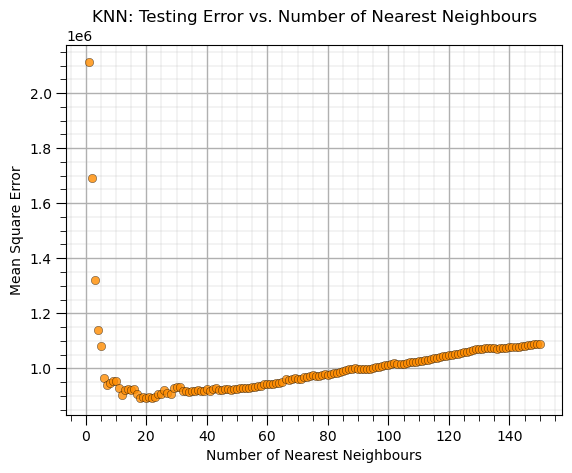

In [163]:
plt.subplot(111)
plt.scatter(k_list,MSE_knn_list,s=None, c='darkorange', alpha=0.8, linewidths=0.3, edgecolors="black") # scatter plot testing MSE vs. hyperparameter
plt.title('KNN: Testing Error vs. Number of Nearest Neighbours'); plt.xlabel('Number of Nearest Neighbours'); plt.ylabel('Mean Square Error'); add_grid()

#### Find Tuned Hyperparameter

In [166]:
tuned_k = k_list[np.argmin(MSE_knn_list)]                         # get the k that minimizes the testing MSE
print('Tuned K is : ' + str(tuned_k))

Tuned K is : 22


#### Retrain the Tuned Model on all the Data

In [169]:
knn_tuned_model = KNeighborsRegressor(weights = weights, n_neighbors=tuned_k, p = 2).fit(X_imputed_norm,y) # retrain the tuned model with all data

#### Load New Data to Apply the Tuned Model

In [172]:
df_new = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v3.csv") # load the data from my github repo
df_new.drop('Prod', axis=1, inplace=True)                     # in actual use, we would not have the truth, so removing it here
X_new = df_new.loc[:,selected_predictor_features]             # select the predictor features
X_new_imputed = mice_imputer.fit_transform(X_new)             # impute the missing data
X_new_imputed = pd.DataFrame(X_new_imputed, columns=X_new.columns, index=X_new.index) # make imputed results into a DataFrame
X_new_imputed_norm = normalizer.fit_transform(X_new_imputed)  # normalize the predictor featurs
X_new_imputed_norm = pd.DataFrame(X_new_imputed_norm, columns=X_new_imputed.columns)
X_new_imputed_norm.head()                                     # preview the DataFrame

,Por,LogPerm,AI,Brittle
0,0.325294,0.437788,0.453731,0.960076
1,0.342941,0.525346,0.579104,0.480038
2,0.439412,0.382488,0.814925,0.842894
3,0.654118,0.824885,0.402985,0.393378
4,0.645294,0.645161,0.567164,0.000000


#### Apply Tuned Model to Predict on New Data

In [175]:
y_new_pred = knn_model.predict(X_new_imputed_norm)            # predict over the testing cases
df_new['Predictions'] = y_new_pred
df_new.head()                                                 # preview the DataFrame 

,Well,Por,LogPerm,AI,Brittle,TOC,VR,Predictions
0,1,12.08,1.07,2.80,81.40,1.16,2.31,1421.089666
1,2,12.38,1.26,3.22,46.17,0.89,1.88,1820.646128
2,3,14.02,0.95,4.01,72.80,0.89,2.72,1369.546228
3,4,17.67,1.91,2.63,39.81,1.08,1.88,3695.727164
4,5,17.52,1.52,3.18,10.94,1.51,1.90,2123.695889


#### Comments

These are some basic code snipets for predictive machine learning in Python. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)